In [1]:
addpath(genpath('../../matlab/Linear-STSC/src/'))
addpath(genpath('../../matlab/utils/chebfun/'))
addpath(genpath('../../matlab/utils/tt-toolbox/'))
addpath(genpath('../../matlab/utils/ttfunc/'))
close all; clear;

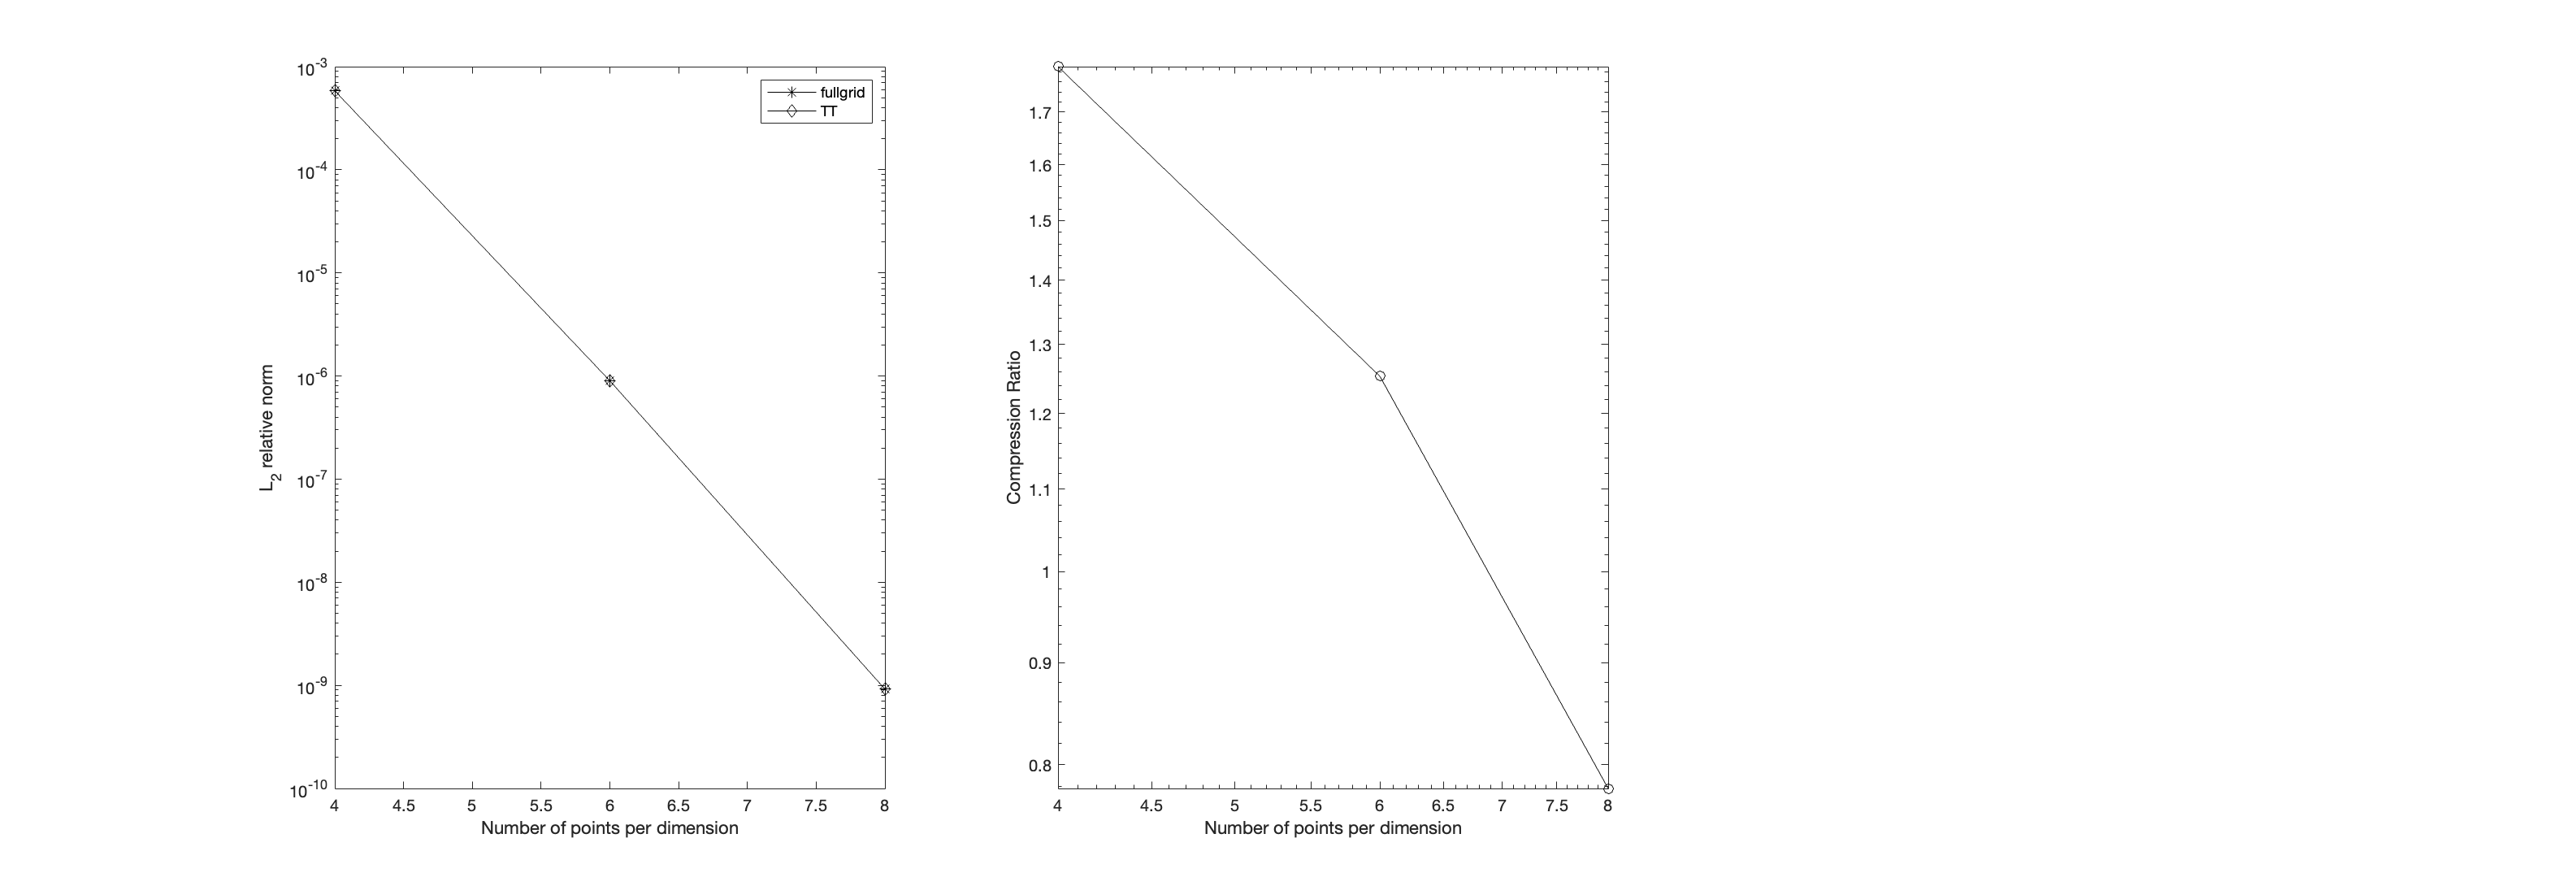

In [2]:
%% load results files
testname = 'ConstantCoeff';


ttfddata = load(sprintf('plot_data/tt_ST_FD_%s.mat',testname));
ttspdata = load(sprintf('plot_data/tt_ST_SP_%s.mat',testname));
fgspdata = load(sprintf('plot_data/fullgrid_ST_SP_%s.mat',testname));

%% 3 plots solution differences in rho
fgI = [1:3];
ttI = [1:3];
fgNs = fgspdata.Ns(fgI);
ttNs = ttspdata.Ns(ttI);
ttfdNs = ttfddata.Ns(ttI);
fgtime = cellfun(@(c) c.time, fgspdata.R(fgI));
tttime = cellfun(@(c) c.time, ttspdata.R(ttI,:));
ttfdtime = cellfun(@(c) c.time, ttfddata.R(ttI,:));
fgerr = cellfun(@(c) c.err, fgspdata.R(fgI));
tterr = cellfun(@(c) c.err, ttspdata.R(ttI,:));
ttfderr = cellfun(@(c) c.err, ttfddata.R(ttI,:));

[comprate,numel] = cellfun(@(c) compress_ratio_tt(c.sol), ttspdata.R(ttI));

%%
figure('Position',[347,591,1585,545])

subplot(1,3,1)
hold on;
plot(fgNs,fgerr,'-*k')
plot(ttNs,tterr,'-dk')

xlabel(sprintf('Number of points per dimension', Interpreter='latex'))
ylabel(sprintf('L_2 relative norm',Interpreter='latex'))
% set(gca, 'YScale','log','Xscale','log')
set(gca, 'YScale','log')
% title('Relative Error')
legend('fullgrid','TT')
box on;

%{
subplot(1,3,2) % grid size vs time
hold on;
plot(fgNs,fgtime,'-*k','DisplayName','FG');
plot(ttNs,tttime,'-dk','DisplayName','TT');

xlabel(sprintf('Number of points per dimension', Interpreter='latex'))
ylabel('Elapsed Time (seconds)')
set(gca, 'YScale','log','Xscale','log')
legend()
% title('Elapsed Time')
box on;
%}

subplot(1,3,2) % grid size vs time
hold on;
plot(ttNs,comprate,'-ok')
xlabel(sprintf('Number of points per dimension', Interpreter='latex'))
ylabel('Compression Ratio')
set(gca, 'YScale','log','Xscale','log')
box on;




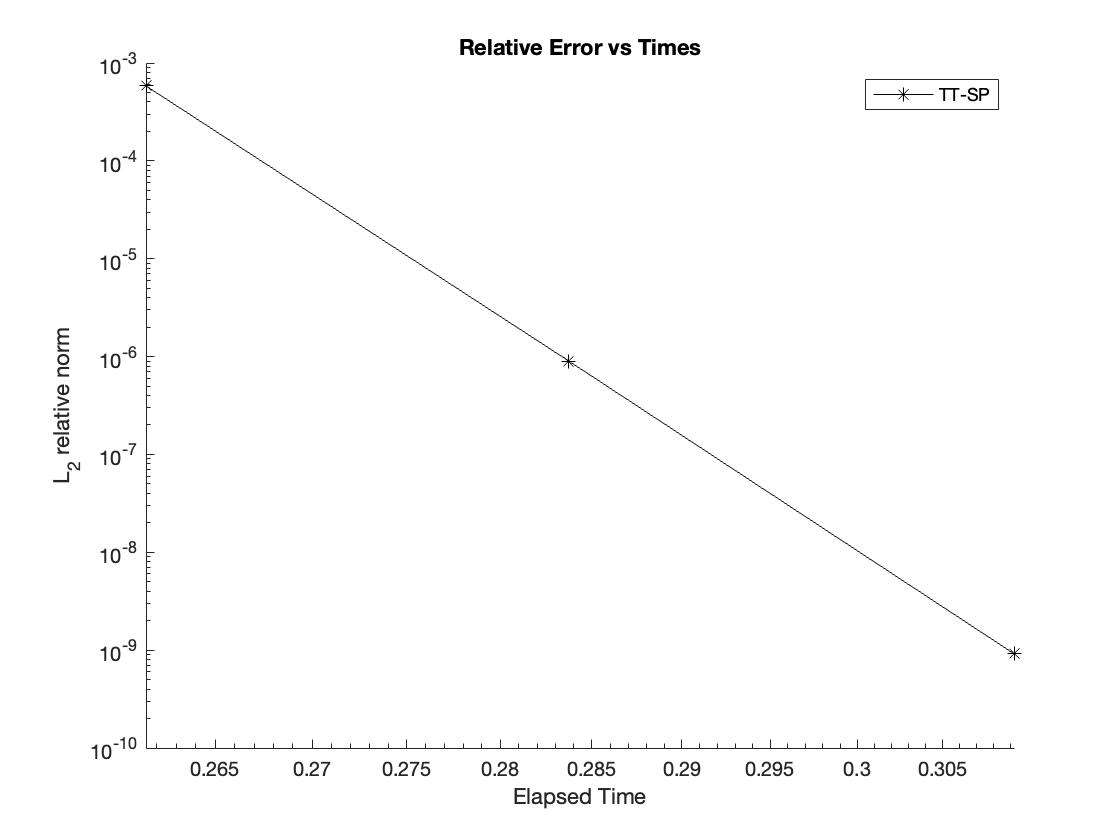

In [3]:
figure(2)
hold on;
plot(tttime,tterr,'-*k')
%plot(ttfdtime,ttfderr,'-dr')

xlabel(sprintf('Elapsed Time', Interpreter='latex'))
ylabel(sprintf('L_2 relative norm',Interpreter='latex'))
set(gca, 'YScale','log','Xscale','log')
title('Relative Error vs Times')
%legend('TT-SP','TT-FD')
legend('TT-SP')

